In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
img_height = 64
img_width = 64
batch_size = 64

# Normalization + Augmentation 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25  # 20% validation
)

train_ds = train_datagen.flow_from_directory(
    r'd:\AI Projects\Signals detecting and classification system\signals_images',  
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_ds = train_datagen.flow_from_directory(
    r'd:\AI Projects\Signals detecting and classification system\signals_images',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 4500 images belonging to 6 classes.
Found 1500 images belonging to 6 classes.


In [3]:
def build_advanced_cnn(input_shape=(64, 64, 1), num_classes=6, dropout_rate=0.2):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    # model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3)))
    model.add(layers.Dropout(0.2))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.3))

    # FC layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


build_advanced_cnn().summary()


C:\Users\asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,553,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,944,902 (26.49 MB)

 Trainable params: 6,944,070 (26.49 MB)

 Non-trainable params: 832 (3.25 KB)

C:\Users\asus\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


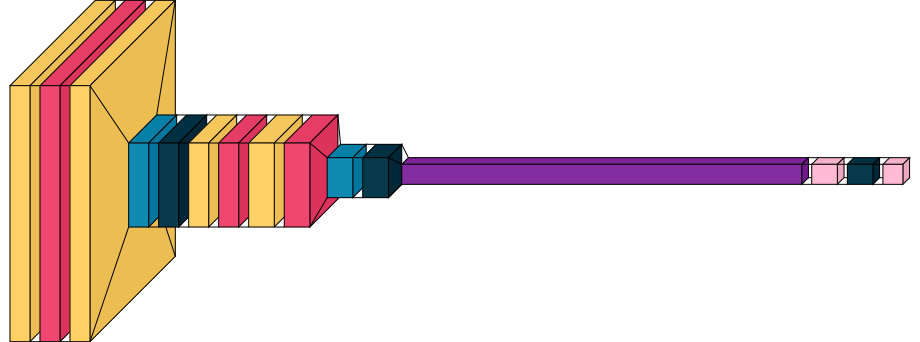

In [4]:

import visualkeras
visualkeras.layered_view(build_advanced_cnn())

In [5]:
model = build_advanced_cnn()
# Adam, RMSprop
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = model.fit(train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[early_stop,reduce_lr]
                    
                   )

C:\Users\asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 547ms/step - accuracy: 0.4684 - loss: 15.0280 - val_accuracy: 0.1667 - val_loss: 15.7310 - learning_rate: 5.0000e-04
Epoch 2/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 550ms/step - accuracy: 0.7982 - loss: 4.9947 - val_accuracy: 0.1667 - val_loss: 10.6119 - learning_rate: 5.0000e-04
Epoch 3/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 546ms/step - accuracy: 0.8375 - loss: 3.0844 - val_accuracy: 0.1667 - val_loss: 5.7043 - learning_rate: 5.0000e-04
Epoch 4/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 550ms/step - accuracy: 0.8636 - loss: 2.0629 - val_accuracy: 0.2333 - val_loss: 3.8729 - learning_rate: 5.0000e-04
Epoch 5/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 555ms/step - accuracy: 0.8908 - loss: 1.4519 - val_accuracy: 0.3360 - val_loss: 2.7840 - learning_rate: 5.0000e-04
Epoch 6/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 553ms/step - accuracy: 0.9012 - loss: 1.0826 - val_accuracy: 0.5553 - val_loss: 2.0706 - learning_rate: 5.0000e-04
Epoch 7/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 549ms/step - 

In [6]:

# # Get true and predicted labels
y_true = np.argmax(model.predict(val_ds,verbose =2 ),axis =1)
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

24/24 - 3s - 107ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step 


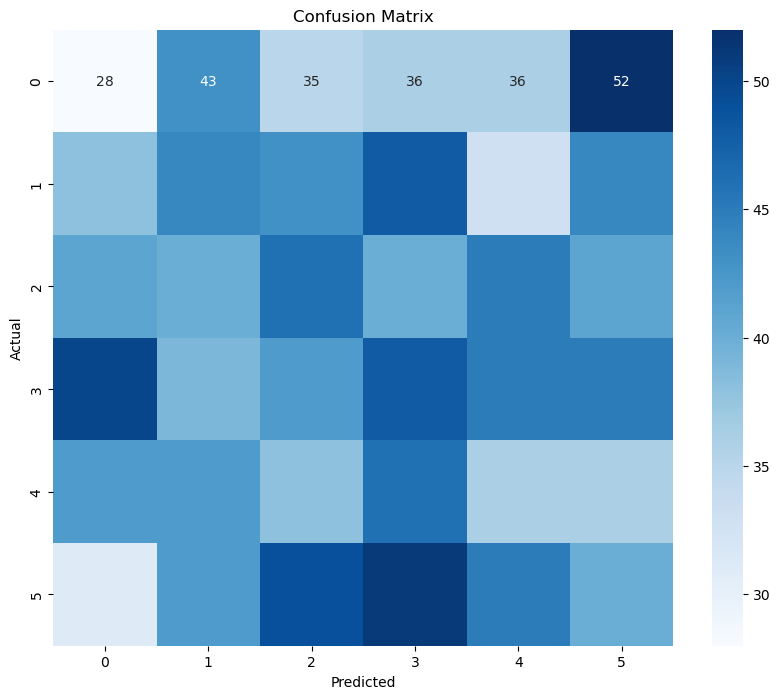

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


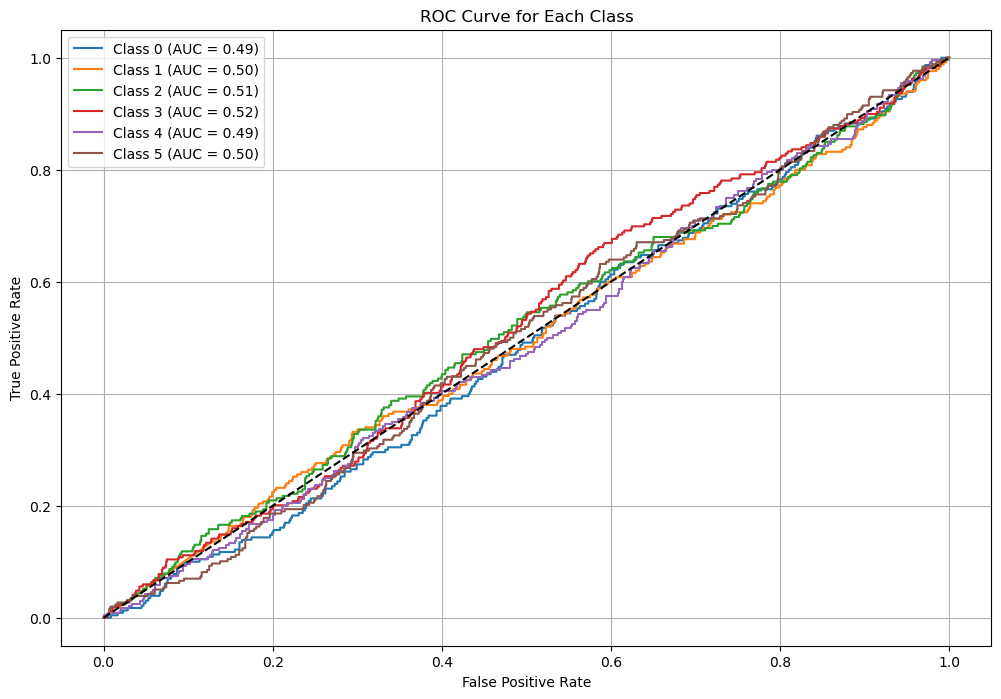

In [8]:
# ROC Curve (for each class)

n_classes = y_pred_probs.shape[1]
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

plt.figure(figsize=(12, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve for Each Class")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

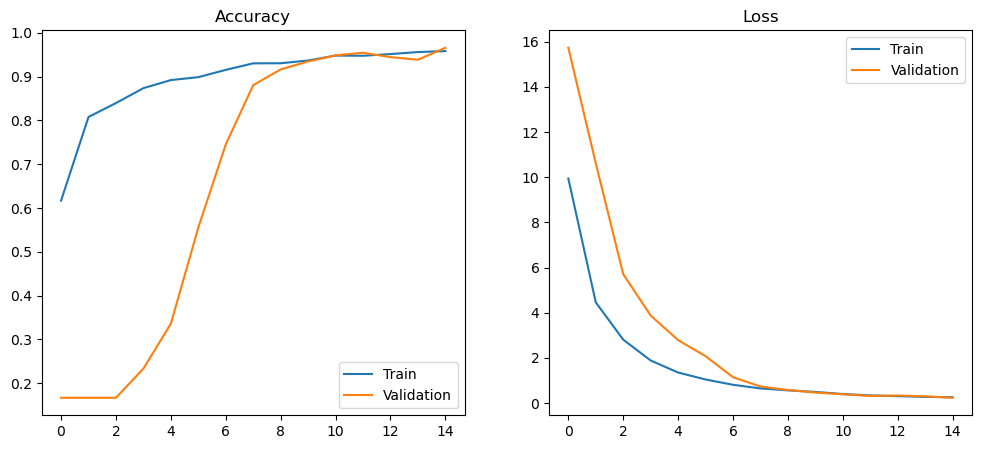

In [9]:
# Accuracy & Loss plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()


In [24]:
os.makedirs('d:\AI Projects\Signals detecting and classification system\models', exist_ok=True)
model.save(r'd:\AI Projects\Signals detecting and classification system\models\classifier_model.h5')